In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import process_for_GowallaCA

local_time
0     2992
1     2128
2     1639
3     1259
4      986
5     1741
6     3245
7     5928
8     8429
9     7267
10    5013
11    4206
12    5037
13    5896
14    5121
15    4847
16    4413
17    5570
18    6199
19    5883
20    5184
21    3975
22    3567
23    3416
dtype: int64
local_time
0      4673
1       963
2       461
3       289
4       553
5      2224
6      5517
7     17403
8     26770
9     17935
10    11484
11    11976
12    17082
13    16774
14    16739
15    18972
16    22235
17    26978
18    36401
19    34095
20    26363
21    20131
22    14416
23    10386
dtype: int64
local_time
0     15839
1     17468
2     17987
3     15220
4     12039
5      9154
6      6431
7      4139
8      2269
9      1132
10      674
11      567
12     1028
13     1873
14     4881
15     8993
16    11356
17    12554
18    13584
19    17260
20    18178
21    16566
22    14725
23    14572
dtype: int64


<BarContainer object of 24 artists>

Text(0.5, 1.0, 'NYC')

Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Count')

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'TKY')

Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Count')

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'Gowalla-CA')

Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Count')

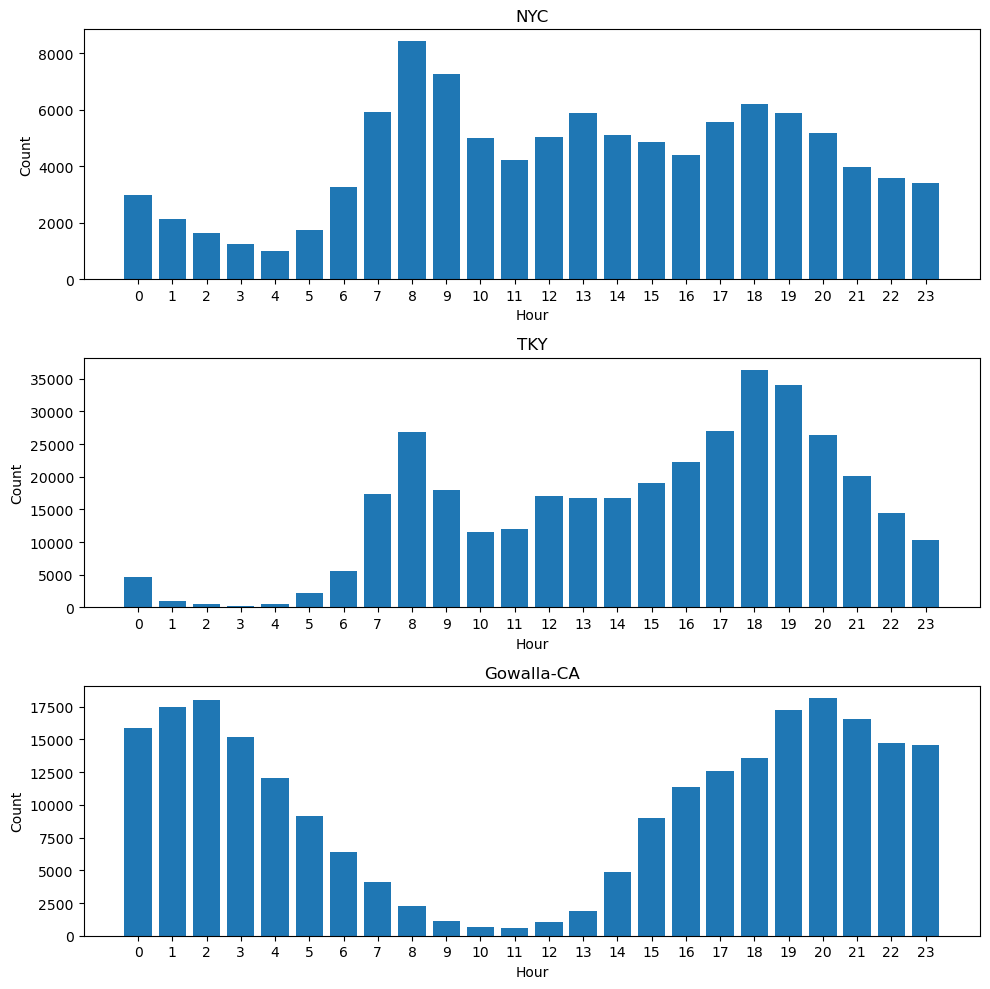

In [6]:
hourly_counts = {}
datasets = ['NYC', 'TKY', 'Gowalla-CA']
for i, dataset in enumerate(datasets):
    df_train = pd.read_csv(rf'./{dataset}/{dataset}_train.csv')
    df_val = pd.read_csv(rf'./{dataset}/{dataset}_val.csv')
    df_test = pd.read_csv(rf'./{dataset}/{dataset}_test.csv')
    if dataset == 'Gowalla-CA':
        df_train = process_for_GowallaCA(df_train)
        df_val = process_for_GowallaCA(df_val)
        df_test = process_for_GowallaCA(df_test)
    merged_df = pd.concat([df_train, df_val, df_test], ignore_index=True)
    merged_df['local_time'] = pd.to_datetime(merged_df['local_time'])
    hourly_counts[i] = merged_df.groupby(merged_df['local_time'].dt.hour).size()
    hourly_counts[i] = hourly_counts[i].reindex(range(24), fill_value=0)
    print(hourly_counts[i])

hours = list(range(24))
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

axes[0].bar(hours, hourly_counts[0])
axes[0].set_title(datasets[0])
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Count')
axes[0].set_xticks(hours)

axes[1].bar(hours, hourly_counts[1])
axes[1].set_title(datasets[1])
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Count')
axes[1].set_xticks(hours)

axes[2].bar(hours, hourly_counts[2])
axes[2].set_title(datasets[2])
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Count')
axes[2].set_xticks(hours)

# 调整子图布局，避免重叠
plt.tight_layout()

plt.savefig('hourly_distributions.pdf', format='pdf')
plt.show()